cifar10

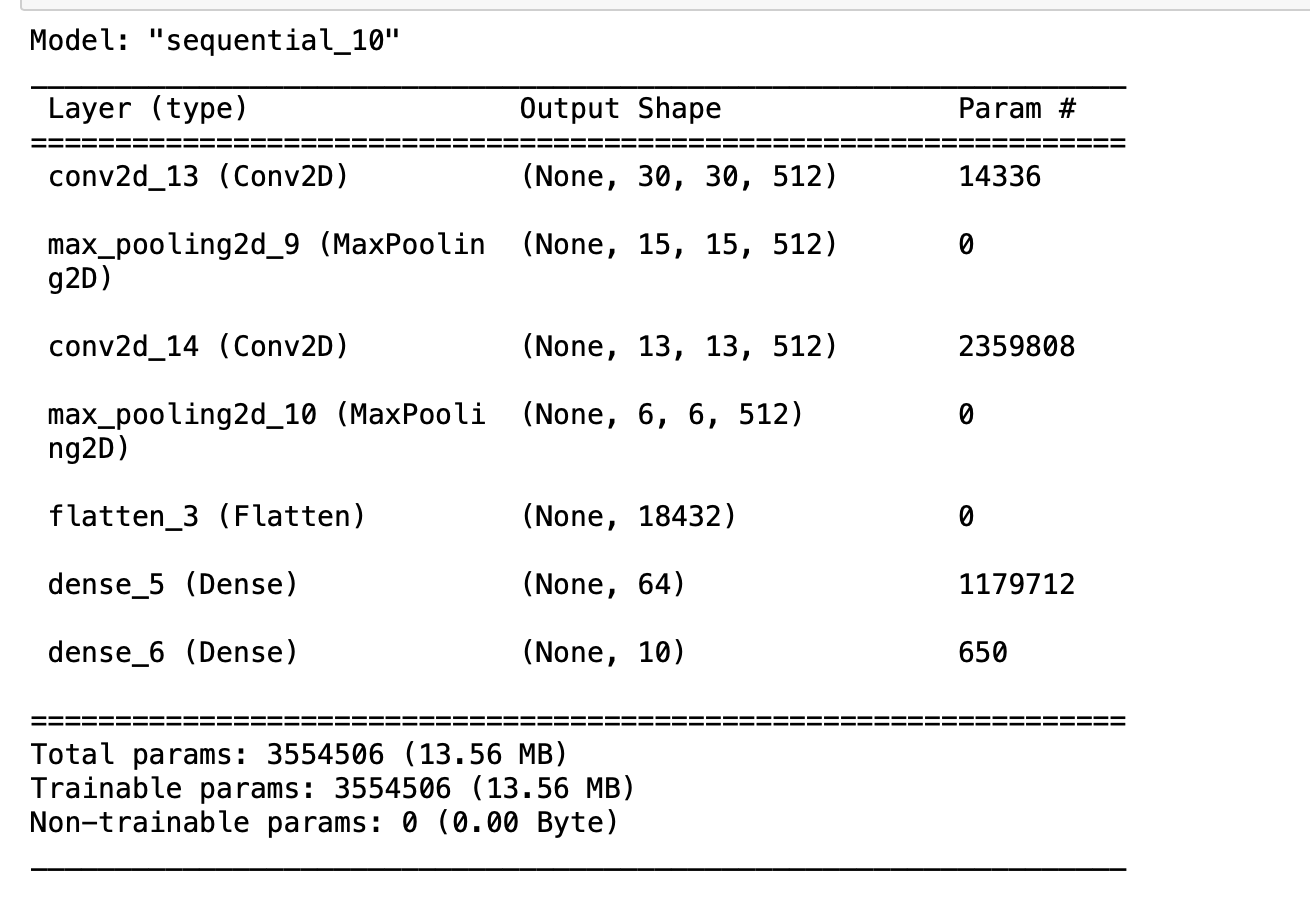

In [1]:
import tensorflow as tf

(train_input,train_target),(test_input,test_target) = tf.keras.datasets.cifar10.load_data()

In [2]:
train_input.shape

(50000, 32, 32, 3)

In [3]:
train_target.shape

(50000, 1)

In [4]:
print(train_target)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [5]:
# 전처리
from tensorflow.keras.utils import to_categorical

train_input = train_input / 255.0
test_input = test_input / 255.0
train_target = to_categorical(train_target)
test_target = to_categorical(test_target)

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Conv2D(512,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D( (2,2) ))
model.add(layers.Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D( (2,2) ))
model.add(layers.Flatten())
model.add(layers.Dense(63, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

2023-10-13 21:33:26.707698: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-10-13 21:33:26.707753: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-10-13 21:33:26.707767: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-10-13 21:33:26.710104: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-13 21:33:26.715282: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 512)       14336     
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 512)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 512)       2359808   
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 512)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 63)                1

In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(train_input,train_target,epochs=5)

Epoch 1/5


2023-10-13 21:33:30.348589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 225s 143ms/step - loss: 1.5401 - accuracy: 0.4686
Epoch 2/5
1563/1563 [==============================] - 234s 150ms/step - loss: 1.2480 - accuracy: 0.5906
Epoch 3/5
1563/1563 [==============================] - 239s 153ms/step - loss: 1.5334 - accuracy: 0.5802
Epoch 4/5
1563/1563 [==============================] - 228s 146ms/step - loss: 2.5346 - accuracy: 0.5602
Epoch 5/5
1563/1563 [==============================] - 207s 133ms/step - loss: 4.4293 - accuracy: 0.5418
